In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 122kB 8.5MB/s 
     |████████████████████████████████| 344.9MB 24kB/s 


In [ ]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dirname = '/content/drive/My Drive/Banana/'

In [ ]:
data = ImageClassifierDataLoader.from_folder(dirname)

INFO:tensorflow:Load image with size: 5280, num_label: 5, labels: Barelyripe Banana, Overripe Banana, Ripe Banana, Underripe Banana, Veryripe Banana.


In [ ]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

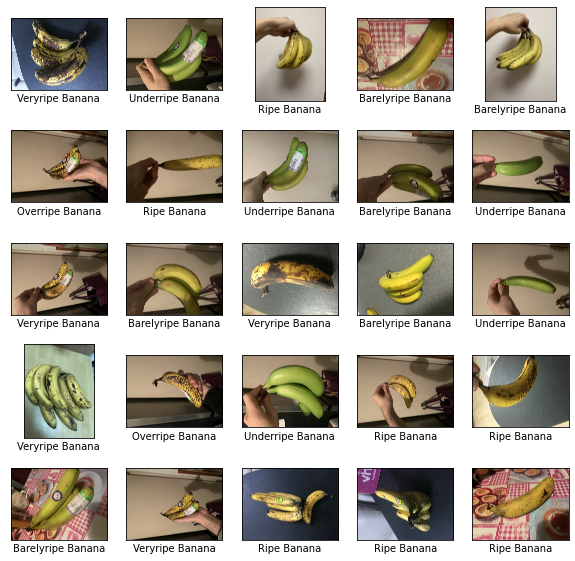

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
model = image_classifier.create(train_data, validation_data=validation_data, batch_size=32, epochs=5)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
132/132 [==============================] - 2283s 17s/step - loss: 1.1210 - accuracy: 0.6081 - val_loss: 0.6792 - val_accuracy: 0.8809
Epoch 2/5
132/132 [==============================] - 2270s 17s/step - loss: 0.6861 - accuracy: 0.8781 - val_loss: 0.6202 - val_accuracy: 0.9160
Epoch 3/5
132/132 [===================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)

17/17 [==============================] - 877s 11s/step - loss: 0.5621 - accuracy: 0.9413


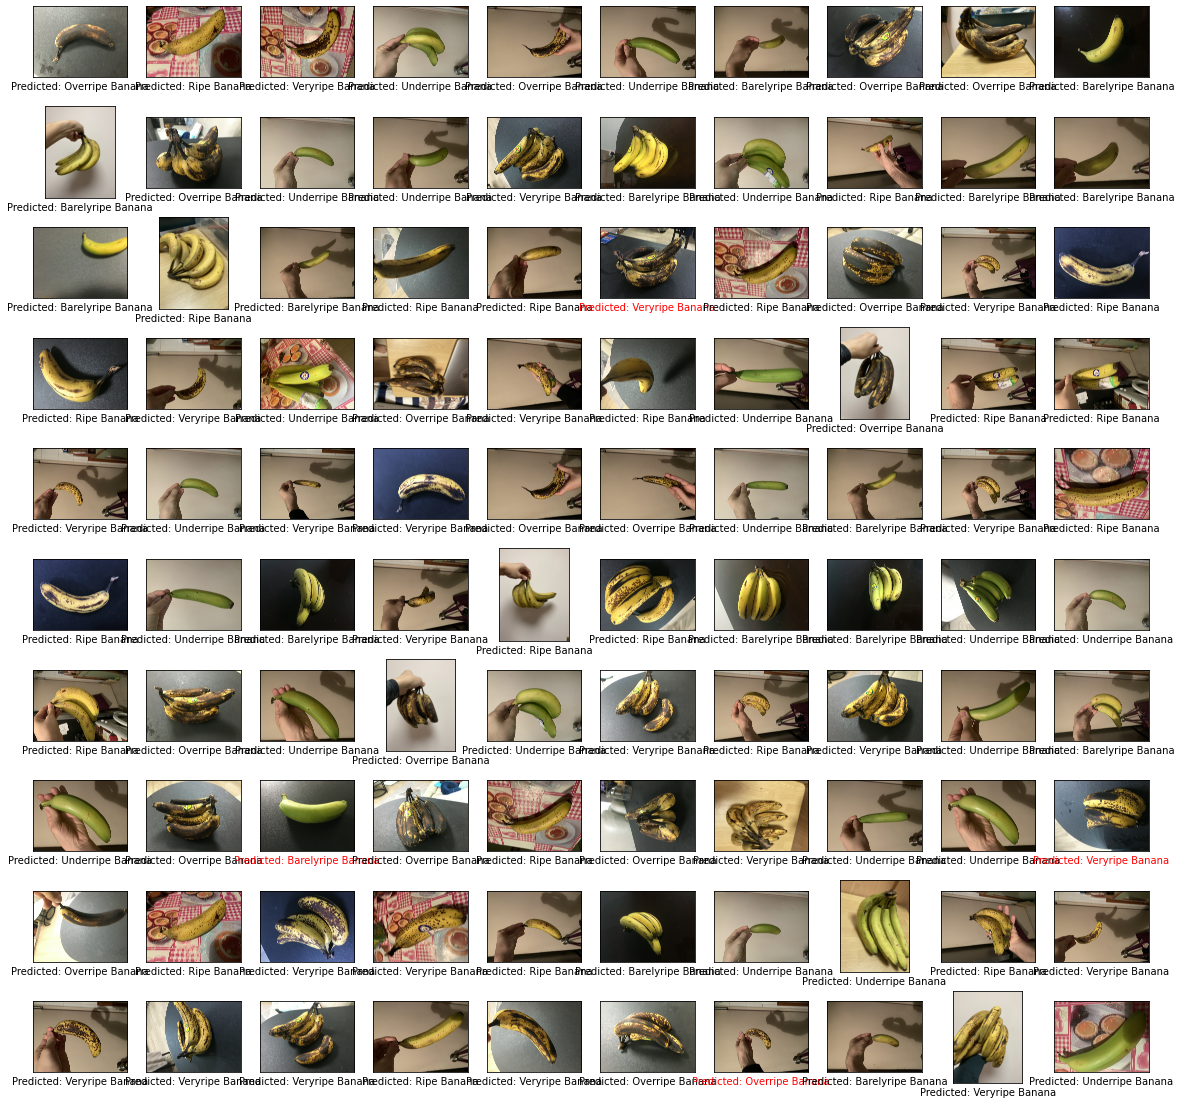

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)
model.export(export_dir='.', tflite_filename='model_quant2.tflite', quantization_config=config)
# model.export(export_dir='/content/drive/My Drive/Hello/')


INFO:tensorflow:Assets written to: /tmp/tmpj6hlt_wp/assets


INFO:tensorflow:Assets written to: /tmp/tmpj6hlt_wp/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpl5h0l96f/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpl5h0l96f/labels.txt.


In [ ]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.80784315 0.8117647  0.7411765 ]
   [0.78039217 0.76862746 0.73333335]
   [0.80784315 0.8        0.7529412 ]
   ...
   [0.4745098  0.46666667 0.40784314]
   [0.43529412 0.44705883 0.4117647 ]
   [0.41568628 0.39607844 0.38039216]]

  [[0.78039217 0.78039217 0.73333335]
   [0.8039216  0.7882353  0.74509805]
   [0.8        0.78431374 0.7411765 ]
   ...
   [0.4019608  0.39803922 0.34901962]
   [0.45294118 0.44509804 0.39607844]
   [0.45686275 0.4254902  0.40392157]]

  [[0.81960785 0.78431374 0.75686276]
   [0.7647059  0.7490196  0.7058824 ]
   [0.7921569  0.7764706  0.7411765 ]
   ...
   [0.3647059  0.3372549  0.30588236]
   [0.39607844 0.39607844 0.34901962]
   [0.43137255 0.40392157 0.37254903]]

  ...

  [[0.9882353  1.         0.9843137 ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.20980392 0.20392157 0.16666667]
   [0.2764706  0.28235295 0.24509805]
   [0.2529412  0.24901962 0.2       ]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.80784315 0.8117647  0.7411765 ]
   [0.78039217 0.76862746 0.73333335]
   [0.80784315 0.8        0.7529412 ]
   ...
   [0.4745098  0.46666667 0.40784314]
   [0.43529412 0.44705883 0.4117647 ]
   [0.41568628 0.39607844 0.38039216]]

  [[0.78039217 0.78039217 0.73333335]
   [0.8039216  0.7882353  0.74509805]
   [0.8        0.78431374 0.7411765 ]
   ...
   [0.4019608  0.39803922 0.34901962]
   [0.45294118 0.44509804 0.39607844]
   [0.45686275 0.4254902  0.40392157]]

  [[0.81960785 0.78431374 0.75686276]
   [0.7647059  0.7490196  0.7058824 ]
   [0.7921569  0.7764706  0.7411765 ]
   ...
   [0.3647059  0.3372549  0.30588236]
   [0.39607844 0.39607844 0.34901962]
   [0.43137255 0.40392157 0.37254903]]

  ...

  [[0.9882353  1.         0.9843137 ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.20980392 0.20392157 0.16666667]
   [0.2764706  0.28235295 0.24509805]
   [0.2529412  0.24901962 0.2       ]]

  [[0.

{'accuracy': 0.9412878787878788}

In [ ]:
# config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)
# model.export(export_dir='.', tflite_filename='model_quant2.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmp9hygbmps/assets


INFO:tensorflow:Assets written to: /tmp/tmp9hygbmps/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmps8t0h_zx/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmps8t0h_zx/labels.txt.


In [ ]:
image_classifier.create?

In [ ]:
ImageClassifierDataLoader?

In [ ]:
type(data)

tensorflow_examples.lite.model_maker.core.data_util.image_dataloader.ImageClassifierDataLoader